In [3]:
# Calculation of complete reporting rates with program and stock data

%matplotlib inline  
# !pip install matplotlib

import pandas as pd
import numpy as np
import pandas_highcharts.core
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot 

# weird construct - if you don't from * import * you have to use datetime.datetime in commands
from datetime import datetime, date, timedelta

from isoweek import Week

import os

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import rename_cols, assign_state_lga_num

import django
django.setup()

# is this line necessary?
from home.models import Program, Stock, Site

In [8]:
# Import Program Data
engine = create_engine(
    'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}'.format(**settings.DATABASES['default']))
df = pd.read_sql_query("select * from program;", con=engine)

In [3]:
# !pip install isoweek

# install isoweek if not installed already

In [4]:
# !pip freeze

# to get info for requirements.txt

In [5]:
# Follow order for cleaning data for graph
#  - convert from string to float
#  - filter out incorrect data with query
#  - convert from float to int

# df['siteid'] = pd.to_numeric(df.siteid, errors='coerce')
# df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')

# df = df.query('siteid==siteid').query('0<siteid<3999990999')
# 2015 had 53 weeks
# 2016 had 52 weeks - current data is only for weeknumbers from 22-2016 to present
# df = df.query('weeknum==weeknum').query('0.99<weeknum<53')

# df['siteid'] = df.siteid.astype('int')
# df['weeknum'] = df.weeknum.astype('int')

In [5]:
# Before filter - Sort data
# df = df.sort_values(by='last_seen', ascending = False)
# len(df)

# it doesn't seems that we are sorting anymore in views.py

26615

In [6]:
# Filter one entry per weeknum
# df = df.drop_duplicates(['siteid', 'weeknum', 'type'], keep ='first')
# len(df)

26615

In [9]:
# count of number of rows with each unique value of var
df.type.value_counts()

OTP    25481
SC      2148
Name: type, dtype: int64

In [10]:
# number of distinct values in column
len(df['type'].unique())

2

In [11]:
# the unique values for var in column
df.type.unique()

array([u'SC', u'OTP'], dtype=object)

In [12]:
df.confirm.value_counts()

Yes    27629
Name: confirm, dtype: int64

In [13]:
# to make reporting rates need to identify all data in past 8 weeks

# create today's weeknum

# create weeknum / year of report date

#for range in todays weeknum-8 to todays weeknum
#   count number of valid reports for program and stocks
#   divide total over 16 (8 entries for program and 8 for stock)

In [22]:

df['year_weeknum'] = zip(df['year'], df['weeknum'])
df['iso_year_weeknum'] = df['year_weeknum'].map(lambda x: Week(x[0], x[1]))

year, week, _ = date.today().isocalendar()
current_week = Week(year, week)

# since how many week this report is about
df['since_x_weeks'] = df['iso_year_weeknum'].map(lambda x: current_week - x)

In [27]:
df.query('since_x_weeks>0').query('since_x_weeks<=8').groupby(df['siteid'])[
        'weeknum'].count().map(lambda x: (x / 8.) * 100).mean()

79.642857142857139

In [25]:
df.query('since_x_weeks>0').query('since_x_weeks<=8').sort("weeknum")

/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,last_seen_weeknum,rep_year_wn,rep_weeknum,last_seen_dotw,last_seen_hour,year_weeknum,iso_rep_year_wn,iso_year_weeknum,iso_diff,since_x_weeks
722,451944813,5365967a-de89-48cc-8482-0ead8ee7136f,tel:+2347038065631,Ismaila Saidu Fago.,None,2004210001,2017-03-25 16:14:34.712398,2017-03-25 16:20:26.051557,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",-1,8
764,451868668,371b1154-35a0-46bf-b8b2-f566ba3f7c4b,tel:+2348168046213,Adenshi Musa Nemuel.,None,220110023,2017-03-25 07:37:17.476927,2017-03-25 08:01:49.133427,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",-1,8
770,463431617,b93e8e65-e2e7-4168-9be9-bd2f60564727,tel:+2348032839852,BABA WAZIRI AHETTIMA.,None,819110015,2017-04-28 09:20:13.553046,2017-04-28 09:52:52.033263,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",-6,8
4042,445323654,47b49a3a-3b3c-482a-866e-a170188e04a1,tel:+2348038078904,Salisu Yusif.,None,1703110034,2017-03-16 14:49:14.708927,2017-03-16 15:00:11.621151,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
12750,445411766,fc71409f-4def-4465-b4d5-1eb09543776c,tel:+2347010300455,Abdulkadir Mohammed Bawa.,None,504110027,2017-03-17 14:56:54.198296,2017-03-17 15:11:41.509324,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
4091,445312090,740113d4-3c3b-415c-b103-8596da6cc14e,tel:+2348135497532,Nafisat A. Sanni .,None,3607210081,2017-03-16 11:26:00.799679,2017-03-16 11:29:46.625878,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
4179,444994778,387150a4-4075-4090-8a44-d6508b310b93,tel:+2348033482620,Umar Abdullahi.,None,3513110017,2017-03-14 12:48:24.261233,2017-03-14 12:55:00.750261,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
4180,444994744,61180a00-5705-438b-96bb-866c69f3ff45,tel:+2348086553022,Mahmud Bello.,None,211110015,2017-03-14 12:45:23.301857,2017-03-14 12:53:38.728598,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
4182,444994764,9ea2e3f9-dd78-4e1e-be89-ac8a30146875,tel:+2348038279551,Saidu Danlami.,None,1818110011,2017-03-14 12:46:45.664691,2017-03-14 12:52:12.628120,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8
4191,444993532,02d708cc-787c-43a7-a942-1a5b58ef4f2c,tel:+2348030605367,Aishatu Ibrahim.,None,3321110023,2017-03-14 12:10:11.147018,2017-03-14 12:22:36.708073,11,Site,...,None,None,None,None,None,"(2017, 11)",None,"(2017, 11)",0,8


In [ ]:
# below is old code

In [12]:
# print datetime.now(), type(datetime.now())
# 2017-03-29 15:32:15.342119 

#df.last_seen
# 2017-03-20 07:12:32

#datetime and numpy date64 appear the same

#rep_week = date(2017, 1, 1).isocalendar()
#rep_week

#df.rep_weeknum = date(df.last_seen).strftime("%V")
#df.rep_weeknum = date(df.last_seen).isocalendar()
# cannot use python commands on dfs ?

#df=df.assign(rep_weeknum=lambda df: date(df.last_seen).isocalendar())

# this did not work when test, but now appears to work
# df['rep_year_wn'] = df['last_seen'].map(lambda x: x.isocalendar())

#import time
#from time import gmtime, strftime
#df.rep_weeknum = time(df.last_seen, "%Y %m %d")
# print(strftime("%W", df.rep_weeknum))

# This works but is a hack because there is an error between year and week number
df['rep_year'] = df['last_seen'].map(lambda x: x.to_pydatetime().isocalendar()[0])

# double check if the week number below is ISO standard
# I don't know the reference for week below, but appears to be ISO week
df['rep_weeknum'] = df['last_seen'].map(lambda x: x.to_pydatetime().isocalendar()[1])
                                        
# Isocalendar is better to use as it tracks (year, weeknum, day of week)                                        

In [13]:
df['last_seen'][0]

Timestamp('2017-04-10 07:05:16')

In [15]:
df['rep_year_wn'].head()

0    (2017, 15, 1)
1    (2017, 15, 1)
2    (2017, 15, 1)
3    (2017, 15, 1)
4    (2017, 15, 1)
Name: rep_year_wn, dtype: object

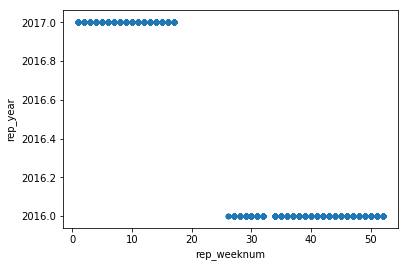

In [13]:
df.plot.scatter(x='rep_weeknum', y='rep_year')
# the problem with week number 52 year 2017 was addressed with the > 44 and year < current year conditional

In [14]:
# clean data

# delete all future reporting -before 10 am on the first day of the report week. 
df['last_seen_dotw'] = df['last_seen'].map(lambda x: x.to_pydatetime().isocalendar()[2])
df['last_seen_hour'] = df['last_seen'].map(lambda x: x.to_pydatetime().hour)


In [15]:
df.query('last_seen_dotw==1').query('last_seen_hour<10').query('rep_weeknum==weeknum')['name'].groupby(df['name']).count().plot(kind='bar', rot=90)
# if these data are removed already, the code will crash

TypeError: Empty 'DataFrame': no numeric data to plot

In [16]:
bad_index = df.query('last_seen_dotw==1').query('last_seen_hour<10').query('rep_weeknum==weeknum').index.tolist()

# print df.count()
df = df[~df.index.isin(bad_index)]

In [17]:
df['last_seen_weeknum_8weekago'] = df['last_seen'].map(lambda x: (x.to_pydatetime() - timedelta(weeks=8)).isocalendar()[1])

In [21]:
# Report date_WN - Weeknum (Modulo of 52)
# gives number of weeks prior to weeknum
(2 - 51) % 52

3

In [22]:
df.head()

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,rep_weeknum,last_seen_dotw,last_seen_hour,year_weeknum,iso_rep_year_wn,iso_year_weeknum,iso_diff,since_x_weeks,rep_year,last_seen_weeknum_8weekago
0,10652,c2455d82-51de-4e7f-b1e9-7e1f95070af2,2347039083116,Mohammad Aisami.,"AlertRUTF, Imam Supervision, Imam Supervision ...",3513110001,2017-04-10 07:02:07,2017-04-10 07:05:16,13,Site,...,15,1,7,"(2017,13)","(2017,15)","(2017,13)",-2,2,2017,7
1,17061,e76a1b28-7b04-4747-b33c-b7495b9bd444,2348029448557,Lamba Abba Kurama.,"Imam Supervision, Imam Supervision 2, Imam Sup...",825110005,2017-04-10 06:54:14,2017-04-10 06:59:30,12,Site,...,15,1,6,"(2017,12)","(2017,15)","(2017,12)",-3,3,2017,7
2,17060,e76a1b28-7b04-4747-b33c-b7495b9bd444,2348029448557,Lamba Abba Kurama.,"Imam Supervision, Imam Supervision 2, Imam Sup...",825110005,2017-04-10 06:38:23,2017-04-10 06:48:01,11,Site,...,15,1,6,"(2017,11)","(2017,15)","(2017,11)",-4,4,2017,7
3,32532,2ecb274e-11fd-413a-9cab-07e7e3f6ef88,2347037692763,Umar Ibrahim.,"AlertRUTF, Imam Supervision, Imam Supervision ...",2112110011,2017-04-10 06:43:45,2017-04-10 06:47:04,14,Site,...,15,1,6,"(2017,14)","(2017,15)","(2017,14)",-1,1,2017,7
4,17059,e76a1b28-7b04-4747-b33c-b7495b9bd444,2348029448557,Lamba Abba Kurama.,"Imam Supervision, Imam Supervision 2, Imam Sup...",825110005,2017-04-10 06:26:32,2017-04-10 06:31:58,10,Site,...,15,1,6,"(2017,10)","(2017,15)","(2017,10)",-5,5,2017,7


In [18]:
df['year'] = df['last_seen'].map(lambda x: x.year)

df['last_seen_weeknum'] = df['last_seen'].map(lambda x: x.week)
df['year'] = np.where(df['last_seen_weeknum'] < df['weeknum'],
                                        df['year'] - 1, df['year'])

df['year_weeknum'] = zip(df['year'], df['weeknum'])

In [19]:
# from isoweek import Week
# w = Week(2011, 20)

from isoweek import Week
df['iso_rep_year_wn'] = df['rep_year_wn'].map(lambda x: Week(x[0], x[1]))

df['iso_year_weeknum'] = df['year_weeknum'].map(lambda x: Week(x[0], x[1]))

In [20]:
# Remove all reports for dates in the future.
bad_index2 = df.query('rep_year_wn<year_weeknum').index.tolist()
df = df[~df.index.isin(bad_index2)]

In [21]:
# this mean that iso week comparison yield the same result than tuple comparison
((df['iso_rep_year_wn'] >= df['iso_year_weeknum']) == (df['rep_year_wn'] >= df['year_weeknum'])).describe()

count     26582
unique        1
top        True
freq      26582
dtype: object

In [22]:
df['iso_diff'] = (df['iso_year_weeknum'] - df['iso_rep_year_wn'] )
# iso_diff is the number of weeks between the last_seen weeknum and weeknum
# clarify this language
df['iso_diff'].groupby(df['iso_diff']).count().describe()

count      13.000000
mean     2044.769231
std      2842.141656
min         1.000000
25%        30.000000
50%      1097.000000
75%      1883.000000
max      9513.000000
Name: iso_diff, dtype: float64

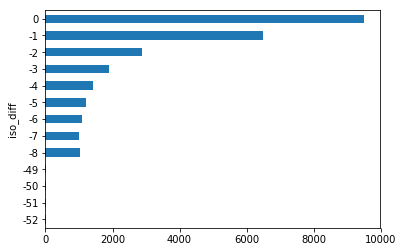

In [23]:
df['iso_diff'].groupby(df['iso_diff']).count().plot.barh()

In [24]:
df['iso_diff'].groupby(df['iso_diff']).count()

iso_diff
-52      30
-51       7
-50       1
-49       1
-8     1034
-7     1009
-6     1097
-5     1213
-4     1418
-3     1883
-2     2883
-1     6493
 0     9513
Name: iso_diff, dtype: int64

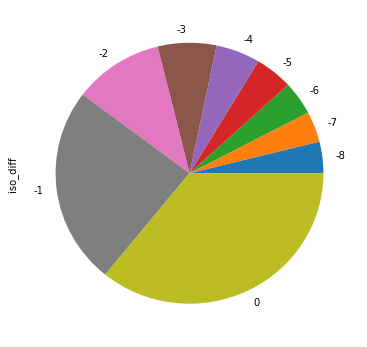

In [25]:
# remove reports for 8 weeks prior to report date
df.query('iso_diff>=-8')['iso_diff'].groupby(df['iso_diff']).count().plot.pie(figsize=(6, 6))

# reporting by the day of the week

In [26]:
year, week, dotw = date.today().isocalendar()
current_week = Week(year, week)

# since how many week this report is about
df['since_x_weeks'] = df['iso_year_weeknum'].map(lambda x: current_week - x)

In [27]:
df.query('since_x_weeks<=8')['since_x_weeks']
# length of time between current week and report week

14467    0
14468    0
14469    1
14470    2
14471    8
14472    0
14473    0
14474    4
14475    1
14476    0
14477    0
14478    0
14479    1
14480    0
14492    2
14519    1
14523    0
14574    0
14608    6
14635    2
14663    0
14750    0
14775    1
14826    7
14830    1
14859    0
14887    0
14913    0
14942    0
14998    2
        ..
4946     8
5048     8
5050     8
5055     8
5087     8
5083     8
5165     8
5167     8
5149     8
5430     8
5688     8
5773     8
5795     8
6021     8
5999     8
6010     8
6045     8
6046     8
6030     8
6033     8
6038     8
6039     8
6053     8
6086     8
21198    8
6107     8
26138    8
26148    8
6117     8
6119     8
Name: since_x_weeks, dtype: int64

In [28]:
df.query('since_x_weeks<=8').query('siteid>101110001').groupby(df['siteid'])['weeknum'].count()

siteid
201110007     5
201110009     8
201110026     4
201110029     4
202110019     5
202110021     8
202110027     4
202110035     8
202110068     8
202610001     3
203110002     8
203110037     8
203110038     8
203110043     8
203110053     6
204110006     8
204110014     6
204110026     7
204110029     8
204110035     3
205110025     2
206110004     8
206110011     9
206110020     9
206110032     1
206110034     8
207110055     8
207110082     8
207110088     4
207110089     9
             ..
3605110020    5
3605110027    5
3605110035    8
3605110051    8
3605110056    5
3605110058    8
3605110063    9
3605210026    5
3607210005    9
3607210063    8
3607210081    8
3607310003    8
3609110002    9
3609110014    8
3609110022    8
3609110026    8
3609110043    9
3609210040    8
3611110009    8
3611110018    5
3611110022    8
3611110026    5
3611110033    5
3611210034    8
3613110001    8
3613110010    8
3613110022    8
3613110044    9
3613110051    8
3613210035    4
Name: weeknum, dt

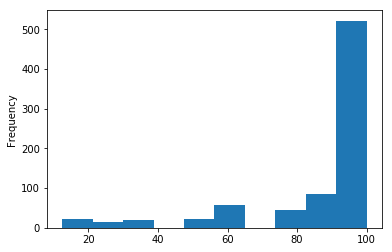

In [35]:
# What is this graph? 
# histogram of percent complete reporting by site over all sites
df.query('since_x_weeks>0').query('since_x_weeks<=8').query('siteid>101110001').groupby(df['siteid'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100).plot.hist()


In [27]:
set(range(5, 13))
# Create a set including all integers from 5 up to not including 13

{5, 6, 7, 8, 9, 10, 11, 12}

In [1]:
# set operation to calculate missing report week numbers
set(range(5, 13)) - set([9, 8, 7, 6, 5])
# Compare complete set of possible week numbers to a set of received set numbers to calculate missing reports

{10, 11, 12}

In [4]:
week = date.today().isocalendar()[1]
range(week - 8, week)

[11, 12, 13, 14, 15, 16, 17, 18]

In [7]:
# making things generic
set(range(week - 8, week)) - set([9, 8, 7, 6, 5, 12, 14])

{11, 13, 15, 16, 17, 18}

In [ ]:
df.query('since_x_weeks<=8').query('siteid>101110001').groupby(df['siteid'])['weeknum']

NameError: name 'df' is not defined

In [31]:
# missing weeks
df.query('since_x_weeks<=8').query('siteid>101110001').groupby(df['siteid'])['weeknum'].unique().map(lambda x: set(range(week - 8, week)) - set(x))

siteid
201110007              {10, 11, 12, 13}
201110009                  {11, 12, 13}
201110026              {10, 11, 12, 13}
201110029               {9, 11, 12, 13}
201410014                   {8, 12, 13}
202110019           {9, 10, 11, 12, 13}
202110021                      {12, 13}
202110027                      {12, 13}
202110035                      {12, 13}
202110068                  {11, 12, 13}
202610001              {10, 11, 12, 13}
203110002                      {12, 13}
203110037                      {12, 13}
203110038                      {12, 13}
203110043                      {12, 13}
203110053                      {12, 13}
204110006                  {11, 12, 13}
204110014              {10, 11, 12, 13}
204110026                  {11, 12, 13}
204110029                      {12, 13}
204110035                      {12, 13}
205110025                  {11, 12, 13}
205110030           {9, 10, 11, 12, 13}
206110004                      {12, 13}
206110011                      {1

In [52]:
df = assign_state_lga_num(df)

In [32]:
# percentage of complete reporting for one site
df.query('since_x_weeks<=8').query('siteid>101110001').query('3611110033==siteid').groupby(df['siteid'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100).tolist()[0]

50.0

In [55]:
df['lga_num'].unique()

array(['818', '3603', '3605', '2034', '1606', '3611', '202', '3308', '204',
       '3613', '513', '3512', '1609', '3501', '2106', '3609', '3507',
       '2026', '813', '3509', '1714', '3514', '2104', '2033', '1727',
       '3513', '3517', '3502', '3510', '2102', '212', '819', '1704',
       '1940', '1604', '812', '3319', '3504', '2027', '2004', '821',
       '3508', '802', '2105', '2113', '3505', '1', '1921', '2117', '2112',
       '1905', '816', '2109', '2018', '206', '1710', '2114', '1702',
       '1818', '827', '3306', '2024', '1724', '1716', '1944', '3511',
       '3304', '2003', '1928', '3305', '504', '3503', '2118', '3301',
       '203', '3317', '1936', '201', '2108', '2001', '804', '2015', '2016',
       '2007', '208', '1719', '512', '3321', '1823', '221', '2115', '2111',
       '2005', '1717', '3602', '2011', '1712', '1703', '2103', '805',
       '3516', '3607', '218', '220', '2010', '215', '1731', '205', '1720',
       '207', '217', '213', '3313', '3515', '3506', '814', '211',

In [61]:
df.query('since_x_weeks<=8').groupby(df['lga_num']).count()

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,year,last_seen_weeknum,year_weeknum,iso_rep_year_wn,iso_year_weeknum,iso_diff,since_x_weeks,siteid_lgt,state_num,lga_num
lga_num,,,,,,,,,,,,,,,,,,,,,
101,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1604,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
1606,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1609,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1702,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
1703,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
1704,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
1706,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1709,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [64]:
df.query('since_x_weeks<=8').query('lga_num=="3603"')

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,year,last_seen_weeknum,year_weeknum,iso_rep_year_wn,iso_year_weeknum,iso_diff,since_x_weeks,siteid_lgt,state_num,lga_num
27735,27625,893376dd-9df2-4a91-8f21-5e68cf724b41,2347069118684,Samaila Sulaiman .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603210001,2017-03-20 07:10:08,2017-03-20 07:12:30,8,Site,...,2017,12,"(2017, 8)","(2017, 12)","(2017, 8)",-4,6,10,36,3603
27734,27624,893376dd-9df2-4a91-8f21-5e68cf724b41,2347069118684,Samaila Sulaiman .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603210001,2017-03-19 19:39:08,2017-03-19 19:43:49,7,Site,...,2017,11,"(2017, 7)","(2017, 11)","(2017, 7)",-4,7,10,36,3603
27732,27622,893376dd-9df2-4a91-8f21-5e68cf724b41,2347069118684,Samaila Sulaiman .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603210001,2017-03-19 18:18:32,2017-03-19 18:23:23,6,Site,...,2017,11,"(2017, 6)","(2017, 11)","(2017, 6)",-5,8,10,36,3603
27472,27363,661ce0cb-5713-4940-825e-143dae67e8c3,2347030380472,Tukur Ahmed .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110012,2017-03-15 12:17:18,2017-03-15 12:23:00,10,Site,...,2017,11,"(2017, 10)","(2017, 11)","(2017, 10)",-1,4,10,36,3603
27755,27645,a4cc3b22-0360-4301-9a6e-b10d0b6731e8,2348086250026,Salisu Abdullahi.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110018,2017-03-13 16:45:33,2017-03-13 16:51:23,10,Site,...,2017,11,"(2017, 10)","(2017, 11)","(2017, 10)",-1,4,10,36,3603
36955,36943,c358d9d3-4d20-46d7-9ba5-123ba4fe3fb8,2348080624352,MANDE SANI.,"No_Email, No_Post, No_SiteID, Nut Personnel",3603110029,2017-03-08 20:46:02,2017-03-08 20:51:19,10,Site,...,2017,10,"(2017, 10)","(2017, 10)","(2017, 10)",0,4,10,36,3603
27684,27574,ca4b9112-0a18-4b7d-920e-182b2134cefe,2348163609837,Mujahid Abdullahi.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110037,2017-03-07 20:20:06,2017-03-07 20:29:57,9,Site,...,2017,10,"(2017, 9)","(2017, 10)","(2017, 9)",-1,5,10,36,3603
27683,27573,ca4b9112-0a18-4b7d-920e-182b2134cefe,2348163609837,Mujahid Abdullahi.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110037,2017-03-07 11:46:13,2017-03-07 11:55:17,10,Site,...,2017,10,"(2017, 10)","(2017, 10)","(2017, 10)",0,4,10,36,3603
27744,27634,a4cc3b22-0360-4301-9a6e-b10d0b6731e8,2348086250026,Salisu Abdullahi.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110018,2017-03-06 18:15:01,2017-03-06 18:21:20,9,Site,...,2017,10,"(2017, 9)","(2017, 10)","(2017, 9)",-1,5,10,36,3603
27471,27362,661ce0cb-5713-4940-825e-143dae67e8c3,2347030380472,Tukur Ahmed .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603110012,2017-03-03 11:26:13,2017-03-03 11:34:16,9,Site,...,2017,9,"(2017, 9)","(2017, 9)","(2017, 9)",0,5,10,36,3603


In [70]:
# percentage of complete reporting for one site
df.query('since_x_weeks<=8').query('"3603"==lga_num').groupby(df['siteid'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100).mean()

56.25

In [71]:
# percentage of complete reporting for one site
df.query('since_x_weeks<=8').query('"3603"==lga_num').groupby(df['lga_num'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100)

lga_num
3603    62.5
Name: weeknum, dtype: float64

In [77]:
# percentage of complete reporting for one site
df.query('since_x_weeks<=8').query('"33"==state_num').groupby(df['siteid'])['weeknum'].count().map(lambda x: (x / 8.) * 100).mean()

65.686274509803923

In [47]:
# percentage of complet reporting for one site
df.query('since_x_weeks<=8').groupby(df['siteid'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100).mean()

84.722222222222229

In [43]:
current_week.week - df['last_seen'].max().week


2

In [77]:
(5 / 8.) * 100

62.5

In [71]:
df['since_x_weeks'].max()

91

In [81]:
# calculate complete reporting for past weeknumbers
# iterate over variable 'since_x_weeks' from current week number
for i in range(0, df['since_x_weeks'].max()):
    print i, df.query('%s<since_x_weeks<=%s' % (i, i + 8)).query('siteid>101110001').query('3611110033==siteid').groupby(df['siteid'])['weeknum'].unique().map(lambda x: (len(x) / 8.) * 100).tolist()

0 [62.5]
1 [75.0]
2 [87.5]
3 [100.0]
4 [100.0]
5 [100.0]
6 [100.0]
7 [100.0]
8 [100.0]
9 [100.0]
10 [100.0]
11 [100.0]
12 [100.0]
13 [100.0]
14 [100.0]
15 [100.0]
16 [100.0]
17 [100.0]
18 [100.0]
19 [100.0]
20 [100.0]
21 [100.0]
22 [87.5]
23 [75.0]
24 [62.5]
25 [50.0]
26 [37.5]
27 [25.0]
28 [12.5]
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 []
50 []
51 []
52 []
53 []
54 []
55 []
56 []
57 []
58 []
59 []
60 []
61 []
62 []
63 []
64 []
65 []
66 []
67 []
68 []
69 []
70 []
71 []
72 []
73 []
74 []
75 []
76 []
77 []
78 []
79 []
80 []
81 []
82 []
83 []
84 []
85 []
86 []
87 []
88 []
89 []
90 []


In [98]:
x, y = [], []
for i in range(0, df['since_x_weeks'].max()):
    w = current_week - i
    print w, len(df.query('%s<since_x_weeks<=%s' % (i, i + 8))['siteid'].unique())
    x.append(df['since_x_weeks'].max() - i) 
    y.append(len(df.query('%s<since_x_weeks<=%s' % (i, i + 8))['siteid'].unique()))

2017W14 770
2017W13 776
2017W12 801
2017W11 818
2017W10 825
2017W09 828
2017W08 836
2017W07 841
2017W06 845
2017W05 847
2017W04 850
2017W03 850
2017W02 854
2017W01 851
2016W52 854
2016W51 855
2016W50 857
2016W49 860
2016W48 861
2016W47 860
2016W46 857
2016W45 851
2016W44 863
2016W43 867
2016W42 859
2016W41 844
2016W40 813
2016W39 804
2016W38 791
2016W37 761
2016W36 503
2016W35 410
2016W34 399
2016W33 373
2016W32 351
2016W31 186
2016W30 176
2016W29 168
2016W28 159
2016W27 112
2016W26 87
2016W25 81
2016W24 82
2016W23 77
2016W22 38
2016W21 36
2016W20 38
2016W19 38
2016W18 33
2016W17 33
2016W16 32
2016W15 34
2016W14 29
2016W13 24
2016W12 19
2016W11 15
2016W10 21
2016W09 110
2016W08 108
2016W07 110
2016W06 110
2016W05 111
2016W04 111
2016W03 110
2016W02 109
2016W01 9
2015W53 14
2015W52 13
2015W51 15
2015W50 15
2015W49 14
2015W48 14
2015W47 13
2015W46 14
2015W45 12
2015W44 9
2015W43 7
2015W42 6
2015W41 2
2015W40 2
2015W39 2
2015W38 1
2015W37 0
2015W36 1
2015W35 2
2015W34 2
2015W33 2
2015W32 

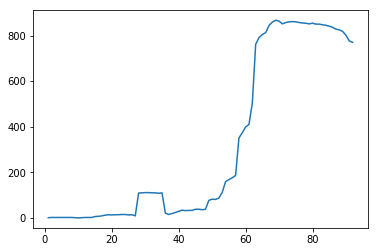

In [99]:
# number of active sites reporting in past 8 weeks
matplotlib.pyplot.plot(x, y)

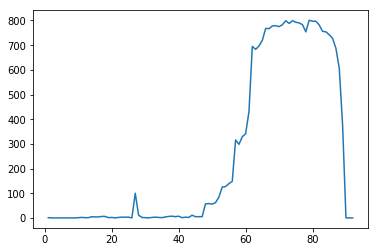

In [101]:
x, y = [], []
for i in range(0, df['since_x_weeks'].max()):
    w = current_week - i
    x.append(df['since_x_weeks'].max() - i) 
    y.append(len(df.query('%s==since_x_weeks' % (i))['siteid'].unique()))
    
# Plot of entries by number of weeks since the project started.  
# The beginning at 0 marks the test data sent with weeknum 1 and year 2016 
matplotlib.pyplot.plot(x, y)

In [29]:
52 / 8.

6.5

In [108]:
df.head()

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,tin,dcur,dead,defu,dmed,tout,confirm,unique,rep_weeknum,rep_year
34607,34499,1fed4097-3edb-44ec-a04d-3dd8fd0f46a7,2348068838496,Hussain Umar Zamni.,"Imam Supervision, Imam Supervision 2, Imam Sup...",818110008,2017-03-20 07:10:19,2017-03-20 07:12:32,11,Site,...,0,None,None,None,None,None,None,2348068838496 2017-03-20 07:10:19,12,2017
27735,27625,893376dd-9df2-4a91-8f21-5e68cf724b41,2347069118684,Samaila Sulaiman .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3603210001,2017-03-20 07:10:08,2017-03-20 07:12:30,8,Site,...,0,None,None,None,None,None,None,2347069118684 2017-03-20 07:10:08,12,2017
28082,27970,d745fc85-ffae-4cfc-935c-267a16bd7bca,2348067698638,Nafiu Bello.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3605110051,2017-03-20 07:04:00,2017-03-20 07:10:05,11,Site,...,0,2.0,0.0,0.0,0.0,2,Yes,2348067698638 2017-03-20 07:04:00,12,2017
25619,25522,eadd9870-9e6a-483d-9669-97291071efe5,2347031104215,Abdullah Maaruf.,"AlertRUTF, Imam Supervision, Imam Supervision ...",2034110031,2017-03-20 06:42:09,2017-03-20 06:46:13,11,Site,...,0,0,0,0,0,0,Yes,2347031104215 2017-03-20 06:42:09,12,2017
3979,3959,c6ace209-1c2e-46f2-b008-950715e39df2,2348166722275,Abdulwahab Ismail.,"Imam Supervision, Imam Supervision 2, Imam Sup...",1606110027,2017-03-19 22:47:40,2017-03-19 23:16:51,11,Site,...,0,6,0,0,1,0,Yes,2348166722275 2017-03-19 22:47:40,11,2017


In [23]:
df['rep_iso'] = df['last_seen'].map(lambda x: x.isocalendar())
# why is this working now and not yesterday ? 

In [24]:
df['rep_iso'].head()

34607    (2017, 12, 1)
27735    (2017, 12, 1)
28082    (2017, 12, 1)
25619    (2017, 12, 1)
3979     (2017, 11, 7)
Name: rep_iso, dtype: object

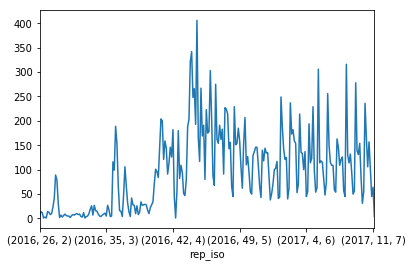

In [208]:
# Plot of data entry by exact date
entries_by_week = df['rep_iso'].groupby(df['rep_iso']).count()
entries_by_week.plot()
# here can see the sine wave related to reporting by week day

In [183]:
# calculate ISO year, weeknum, day for var weeknum



# take first value (year) out of rep_weeknum (year, weeknum, day)
df['rep_year'] = df['last_seen'].map(lambda x: x.isocalendar()[0])
df['rep_weeknum'] = df['last_seen'].map(lambda x: x.isocalendar()[1])

df['rep_weeknum'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 52, 51, 50, 49, 48,
       47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 32, 31, 30,
       29, 28, 27, 26])

In [ ]:
firstjan = datetime(2010, 1, 1).isocalendar()
fourjan = datetime(2010, 1, 4).isocalendar()
print firstjan, type(firstjan)
print fourjan
#print fourjan - firstjan
# Cannot add and subtract from two instances of isocalendar

In [150]:
# to extract a date from isocalendar tuple
# in python 3.6
# datetime.strptime('2010 1 1','%G %V %u').date()

# Create an isocalendar tuple and assign it to isocalendar format
#df['weeknum_date'] = datetime(df['rep_year'],df['weeknum'],1).isocalendar()
#df['weeknum_date'] = datetime(df['rep_year'],df['weeknum'],1).map(lambda x: x.isocalendar())
# Is weeknum a string? NO - This is not the problem
# isocalendar takes a date as input
df['year_wn'] =list(zip(df['rep_year'], df['weeknum']))

In [162]:
# Either create two dates and subtract, or
# subtract the rep_week from weeknum and correct the year

# create date from week number
d = "2017-W1"
r = datetime.strptime(d + '-0', "%Y-W%W-%w")
print r
# does not use ISO week numbers - do not use

#from isoweek import Week
#w = Week(2016, 52)
#print "Week %s starts on %s" % (w, w.monday())
# no module named isoweek

2017-01-08 00:00:00


In [210]:
# to convert iso week number to correct date 
# either change to Python 3.6 or
# calculate first week of year and then convert week number to date, correcting year. 

df['weekdiff'] = df.weeknum - df.rep_weeknum 
# When creating new variables, you cannot refer to the new variable as df.weekdiff

# Change the order (the index) of the columns
columnsTitles = ['weeknum',
                'rep_weeknum',
                 'weekdiff']

df2 = df.reindex(columns=columnsTitles)
df2

,weeknum,rep_weeknum,weekdiff
34607,11,12,-1
27735,8,12,-4
28082,11,12,-1
25619,11,12,-1
3979,11,11,0
27817,11,11,0
20069,11,11,0
911,11,11,0
27816,10,11,-1
19641,9,11,-2


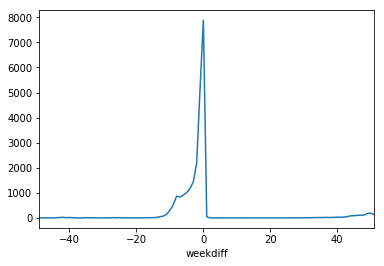

In [211]:
# Univariate plot of values by count of value
wd = df['weekdiff'].groupby(df['weekdiff']).count()
wd.plot()
# have to correct the values that are near weeknum 46

In [189]:
print wd

weekdiff
-49      1
-48      8
-47      2
-45      1
-44      8
-43     15
-42     26
-41     10
-40     18
-39     11
-38      3
-37      1
-36      2
-35     11
-34      7
-33      7
-32      2
-31      1
-30      2
-29      3
-28      3
-27     10
-26      3
-25     13
-24      3
-23      2
-22      6
-21      4
-20      7
-19      5
      ... 
 22      2
 23      2
 24      2
 25      1
 26      3
 27      3
 28      3
 29      5
 30      8
 31      7
 32      9
 33     14
 34     16
 35     15
 36     22
 37     19
 38     19
 39     21
 40     28
 41     25
 42     38
 43     51
 44     84
 45     90
 46    103
 47    110
 48    116
 49    172
 50    195
 51    127
Name: weekdiff, dtype: int64


In [ ]:
# test if report is made in past, current time or future.

# calculate 8 weeks into past


In [196]:
df.year_wn.head()

34607    (2017, 11)
27735     (2017, 8)
28082    (2017, 11)
25619    (2017, 11)
3979     (2017, 11)
Name: year_wn, dtype: object

In [27]:
df['age_group'] = np.where(df['type'] == "OTP", "6-59m", df['age_group'])

In [28]:
# Table of number of counts of age_group over site TYPE
df.groupby(['type', 'age_group']).size()

type  age_group
OTP   6-59m        34705
SC    0-5m           499
      6-59m         2490
      Other           53
      X                1
dtype: int64

In [16]:
# Re-test Problem with data cleaning function

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import assign_state_lga_num,  rename_cols, merge_in_and_outpatients, add_program_reports_from_supervision, generic_cleaning, add_iso_dates, drop_duplicate_reports,program_cleaning

import django
django.setup()

from home.models import Site

In [105]:
df_raw = pd.ExcelFile('/home/robert/Downloads/pro.xlsx').parse('Runs')

In [109]:
rename_cols(df_raw)
merge_in_and_outpatients(df_raw)

columnsTitles = ['contact_uuid',
                 'urn',
                 'name',
                 'groups',
                 'siteid',
                 'first_seen',
                 'last_seen',
                 'weeknum',
                 'role',
                 'type',
                 'age_group',
                 'beg',
                 'amar',
                 'tin',
                 'dcur',
                 'dead',
                 'defu',
                 'dmed',
                 'tout',
                 'confirm']

df = df_raw.reindex(columns=columnsTitles)

 # Data cleaning and preparation
generic_cleaning(df)

,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,type,...,tin,dcur,dead,defu,dmed,tout,confirm,siteid_lgt,state_num,lga_num
3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,23,Site,OTP,...,NaN,10,0,0,0,0,Yes,10,33,3308
4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,22,Site,OTP,...,0,15,0,1,0,0,Yes,10,33,3308
5,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:48:19,2016-07-10 10:02:26,23,Site,OTP,...,0,10,0,0,0,0,Yes,10,33,3308
6,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 12:39:12,2016-07-10 12:51:23,24,Site,OTP,...,0,2,0,1,0,0,Yes,10,33,3308
8,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 13:15:13,2016-07-10 13:32:04,25,Site,OTP,...,0,24,0,0,0,0,Yes,10,33,3308
9,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 13:40:47,2016-07-10 13:58:16,26,Site,OTP,...,0,8,0,0,2,0,Yes,10,33,3308
10,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-11 16:48:45,2016-07-11 17:03:12,23,Site,OTP,...,0,10,0,0,0,0,Yes,10,33,3308
11,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-11 17:19:52,2016-07-11 17:31:14,24,Site,OTP,...,0,2,0,1,0,0,Yes,10,33,3308
12,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-11 18:45:26,2016-07-11 19:00:06,25,Site,OTP,...,0,24,0,0,0,0,Yes,10,33,3308
13,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-11 19:16:26,2016-07-11 19:35:56,26,Site,OTP,...,0,8,0,2,2,0,Yes,10,33,3308


In [102]:
df.keys()

Index([u'contact_uuid', u'urn', u'name', u'groups', u'siteid', u'first_seen',
       u'last_seen', u'weeknum', u'role', u'type', u'age_group', u'beg',
       u'amar', u'tin', u'dcur', u'dead', u'defu', u'dmed', u'tout',
       u'confirm'],
      dtype='object')

In [79]:
# Introducing Year for X axis
df['year'] = df['last_seen'].map(lambda x: x.year)

In [84]:
df['year'].value_counts()
# Years are correct

2016    23508
2017    15621
Name: year, dtype: int64

In [85]:
# If report was for WN in last year but report data is this year, subtract one year from df.year.
# double check if the week number below is ISO standard
df['last_seen_wn'] = df['last_seen'].map(lambda x: x.week)

df['year'] = np.where((df['weeknum'] < df['last_seen_wn'] > 45), df['year'] - 1, df['year'])



# here an error is introduced in year

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

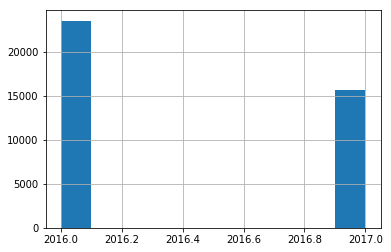

In [112]:
df['last_seen'].map(lambda x: x.year).hist()

In [111]:
df['year'] = df['last_seen'].map(lambda x: x.year)
# df['last_seen_wn'] = df['last_seen'].map(lambda x: x.week)
# df['year'] = np.where(df['last_seen_wn'] < df['weeknum'], df['year'] - 1, df['year'])
df['year'].value_counts()


2016    23508
2017    15621
Name: year, dtype: int64

In [96]:
# Table of number of counts of year over weeknum
df['year'].value_counts()


2016    23508
2017    15621
Name: year, dtype: int64

In [56]:
today_year = date.today().year
today_weeknum = date.today().isocalendar()[1]

In [49]:
# Select df is includes data from WN22 2016 to 2017+
# and most recent data cannot surpass current WN and current year.
df = df \
    [(df['year'] >= 2017) | ((df['year'] == 2016) & (df['weeknum'] >= 22))] \
    [(df['year'] < today_year) | ((df['year'] == today_year) & (df['weeknum'] <= today_weeknum))]

/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [50]:
df['year'].value_counts()

2016    15620
Name: year, dtype: int64

In [ ]:



    # Reporting rates
    df['rep_year_wn'] = df['last_seen'].map(lambda x: x.isocalendar())
    # double check if the week number below is ISO standard
    # I don't know the reference for week below, but appears to be ISO week
    df['rep_weeknum'] = df['last_seen'].map(lambda x: x.to_pydatetime().isocalendar()[1])

    # Delete all future reporting -before 10 AM on the first day of the report week.
    df['last_seen_dotw'] = df['last_seen'].map(lambda x: x.to_pydatetime().isocalendar()[2])
    df['last_seen_hour'] = df['last_seen'].map(lambda x: x.to_pydatetime().hour)
    too_early = df.query('last_seen_dotw==1').query('last_seen_hour<10').query('rep_weeknum==weeknum').index.tolist()
    # not df.index isin list of indices too_early
    df = df[~df.index.isin(too_early)]

    df['year_weeknum'] = zip(df['year'], df['weeknum'])
    df['iso_rep_year_wn'] = df['rep_year_wn'].map(lambda x: Week(x[0], x[1]))
    df['iso_year_weeknum'] = df['year_weeknum'].map(lambda x: Week(x[0], x[1]))
    # Remove all reports for dates in the future.
    future_report = df.query('rep_year_wn<year_weeknum').index.tolist()
    df = df[~df.index.isin(future_report)]

    df['iso_diff'] = (df['iso_year_weeknum'] - df['iso_rep_year_wn'])
    # remove reports for 8 weeks prior to report date
    df = df.query('iso_diff>=-8')

    year, week, dotw = date.today().isocalendar()
    current_week = Week(year, week)

    # Report is X weeks before current week number
    df['since_x_weeks'] = df['iso_year_weeknum'].map(lambda x: current_week - x)
    return df